## Capstone-2023: Team-8: Stress and Effect Detection Using Wearable and Sensors Data

#### Install the following packages by uncommenting the pip install command below

* FLIRT package: This package is used to derive features associated with Accelerometer & EDA
* py-ecg-detectors: This package is used to derive ECG frequency
* mne: This package is used to derive features related to EDA sensors

In [1]:
# !pip install flirt

# !pip install py-ecg-detectors

# !pip install mne

### Import Libraries

In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,datetime

import seaborn as sns
sns.set_theme()
import Capstone_Data_Vis_Common as datavis
import Capstone_Feature_Extraction as feature_extraction
import Capstone_Data_Prep_TRAIN_TEST_SPLIT_with_survey_data as dataprep
import Capstone_Utilities as utility

from scipy.signal import argrelextrema

import warnings
warnings.filterwarnings('ignore')

In [4]:
#check for all the files at the repository location
file_path = '/scratch/siads699w23_class_root/siads699w23_class/team8_cpastone_2023/'
files = os.listdir(file_path)
files

['df_final_features.csv',
 'data_with_eda_emg_features_250ms.csv',
 'chest_data_with_label_12_subjects_ALL_DATA_with_survey_and_Anomaly.csv',
 'Capstone_699_Data Wrangling_Visualization_Feature_Model_Biswajit.ipynb',
 'Survey_Data_Clean.csv',
 '.ipynb_checkpoints',
 'subject_personal_info.xlsx',
 'chest_data_with_label_3_subjects_TEST_DATA_with_survey.csv',
 'data_pkl',
 'final_dataset_ACC_EDA_ECG_50ms.csv',
 'survey_ref_table_subject_responses.xlsx',
 'Capstone_Data_Vis_Common.py',
 'survey_ref_table_subject_responses.csv',
 'data_with_eda_features_50ms.csv',
 '.~Capstone_Data_Vis_Common.py',
 'Capstone_Data_Prep_TRAIN_TEST_SPLIT_with_survey_data.py',
 'data_raw_filtered_stats.csv',
 'data_with_acc_features_50ms.csv',
 'Capstone_NN_Training_Data_Inputs_non_scaled_version_100ms.csv',
 'chest_data_with_label_15_subjects_ALL_DATA_with_survey.csv',
 'chest_data_with_label_12_subjects_TRAIN_DATA_with_survey.csv',
 '__pycache__',
 'Capstone_NN_Training_Data_Inputs_non_scaled_version_10ms.cs

In [5]:
pickle_file_name = file_path+'data_pkl/S'
personal_info_file_name = file_path+'subject_personal_info.xlsx'
survey_data_file_name = file_path+'survey_ref_table_subject_responses.csv'
data_file_name = 'chest_data_with_label_12_subjects_TRAIN_DATA_with_survey.csv'

### Data Preparation: Data Cleaning and Final Dataset Creation for Analysis and ML

#### Load Survey Data

In [6]:
survey_data_clean_df = dataprep.Get_Survey_Data_and_Clean(survey_data_file_name)
survey_data_clean_df.head()

Survey Data: 3150


,Subject ID,Category,PANAS01_Active,PANAS02_Distressed,PANAS03_Interested,PANAS04_Inspired,PANAS05_Annoyed,PANAS06_Strong,PANAS07_Guilty,PANAS08_Scared,...,STAI05_WORRIED,STAI06_PLEASANT,SAM01_VALENCE,SAM02_AROUSAL,SSQ01_GOALS,SSQ02_SUCCEED,SSQ03_MOTIVATED,SSQ04_REFLECTED,SSQ03_THINK,SSQ03_IMPRESSION
0,2,1,1,1,3,2,1,3,1,1,...,2,3,7,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,3,2,4,1,3,3,1,2,...,3,1,5,4,5.0,5.0,4.0,4.0,3.0,5.0
2,2,4,1,1,2,3,1,2,1,1,...,2,4,7,2,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3,1,1,2,3,1,1,1,1,...,1,4,8,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2,4,1,1,1,2,1,1,1,1,...,1,4,7,2,NaN,NaN,NaN,NaN,NaN,NaN


#### Load Personal Info Data

In [7]:
personal_info_by_subject_df = dataprep.Load_Personal_Info(personal_info_file_name)
personal_info_by_subject_df.head()

Personal Data: (15, 6)
(15, 5)


,age,height,weight,gender,dominant_hand
subject,,,,,
2,27,175,80,1,1
3,27,173,69,1,1
4,25,175,90,1,1
5,35,189,80,1,1
6,27,170,66,1,1


### Create Train and Test dataset from the row data Pickle file

##### Below steps need to be run one time i.e. first time in the new set up for completing the below steps:

1) Creating combined dataset containing all subjects data : merge each subject's data from pickle file

2) Include subject's personal information from the secondary dataset i.e. personal information dataset

3) Include Subject's Reported Outcomes from secondary dataset i.e. survey dataset

4) Split data into Train and Test dataset: separate csv file for training and testing

In [7]:
### load data here based on variables set at top of this file:

# all subjects list here
####var_subject_ID_list = [2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]
# split dataframe here (training data = 12 subjects)
####var_train_subject_list = [2,3,4,5,6,7,8,9,10,11,13,14]
####var_train_subject_list = [2,3,4,5,6,7,8,9,10]
# split dataframe here (testing data = 3 subjects)
####var_test_subject_list = [11,13,14,15,16,17]

# +++++++ testing here: Utility function generate Train and Test file for subjects as per the below list +++++++++

#subject_ID_list = var_subject_ID_list
#train_subject_list = var_train_subject_list
#test_subject_list = var_test_subject_list

# +++++++++++++++++++++++++++

In [8]:
# dataprep.Load_and_Split_Data(subject_ID_list, 
#                              train_subject_list, 
#                              test_subject_list, 
#                              pickle_file_name, 
#                              personal_info_by_subject_df, 
#                              survey_data_clean_df)

#### Load Sensor Dataset for Analysis

In [8]:
# get Row data
# data_file_name = 'chest_data_with_label_12_subjects_TRAIN_DATA_with_survey.csv'
print('Start Time:',datetime.now())
data_raw = pd.read_csv(file_path+data_file_name)#nrows=1000000)
print('Total Records Count:',data_raw.shape)
print('End Time:',datetime.now())
data_raw.head()

Start Time: 2023-04-06 06:02:36.232993
Total Records Count: (49045500, 56)
End Time: 2023-04-06 06:05:57.956107


,Unnamed: 0,subject,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,...,STAI06_PLEASANT,SAM01_VALENCE,SAM02_AROUSAL,SSQ01_GOALS,SSQ02_SUCCEED,SSQ03_MOTIVATED,SSQ04_REFLECTED,SSQ03_THINK,SSQ03_IMPRESSION,label
0,0,2,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,2,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,2,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130950,-1.161194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Data Visualization

In [17]:
label_counts = data_raw["label"].value_counts()
label_name = data_raw["label"].unique()
print('Label & Records Count:\n',list(zip(label_name,label_counts)))

Label & Records Count:
 [(0, 22563095), (1, 9852502), (2, 6642301), (6, 5518800), (4, 3124101), (3, 467602), (7, 438899), (5, 438200)]


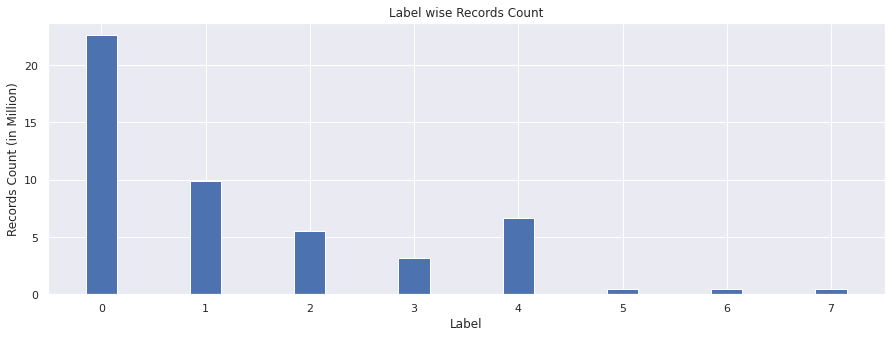

In [18]:
# Plot bar graph for subject wise records count
fig = plt.figure(figsize = (15, 5))
plt.bar(label_counts.index,label_counts/1000000,width = 0.3)

plt.xlabel("Label")
plt.ylabel("Records Count (in Million)")
plt.title("Label wise Records Count")
plt.show()

###### Drop records for effective states : 0,5,6 & 7
* State-0 : <write short description> 
* State-5 to 7: <write short description> 

In [19]:
print('Records count original:',data_raw.shape)
data_raw_filtered = data_raw[(data_raw['label'] < 5) & (data_raw['label'] > 0)]
print('Records count post filtering labels 1 to 4:',data_raw_filtered.shape)

Records count original: (49045500, 56)
Records count post filtering labels 1 to 4: (25137704, 56)


Subjects:S[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14] 
Records Count(in Million):[2.1511, 2.114701, 2.1147, 2.113301, 2.1077, 2.103499, 2.093, 2.0923, 2.091602, 2.079001, 2.054501, 2.022299]


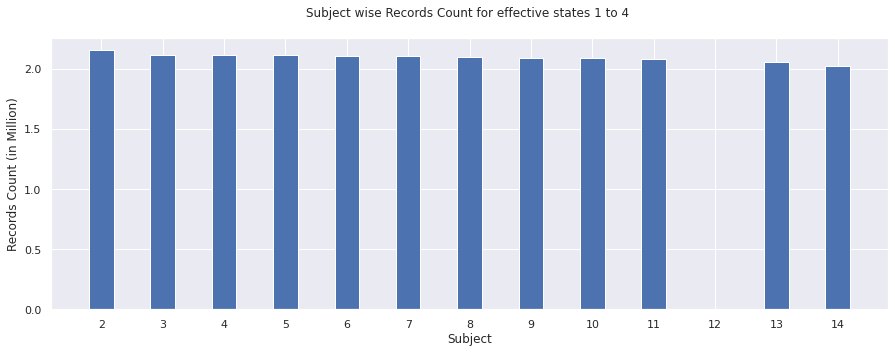

In [21]:
# Records count for each Subject in the training dataset
subj_count = list(data_raw_filtered.subject.value_counts()/1000000)
subj_name = list(data_raw_filtered.subject.unique())
print('Subjects:S{} \nRecords Count(in Million):{}'.format(subj_name,subj_count))

# Plot bar graph for subject wise records count
fig = plt.figure(figsize = (15, 5))
plt.bar(subj_name,subj_count,width = 0.4)

plt.xlabel("Subject")
plt.ylabel("Records Count (in Million)")
plt.xticks(range(2,len(subj_name)+3))
plt.title("Subject wise Records Count for effective states 1 to 4 \n")
plt.show()

In [22]:
effective_state_label = {'Baseline':1,'Stress':2,'Amusement':3,'Meditation':4}
print(list(effective_state_label.keys()))

['Baseline', 'Stress', 'Amusement', 'Meditation']


### Visual Analysis for Different Affective States for a Subjects for a Specified Sensor Type

##### ACC plot for a Subject

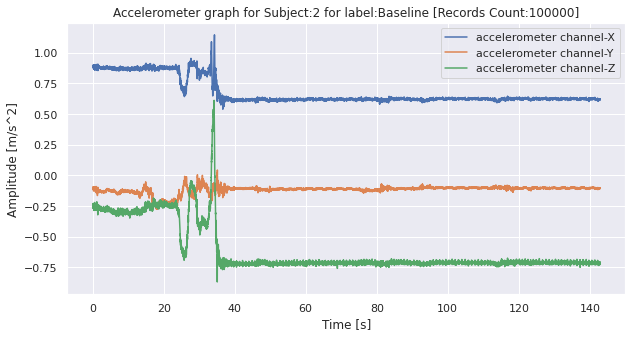

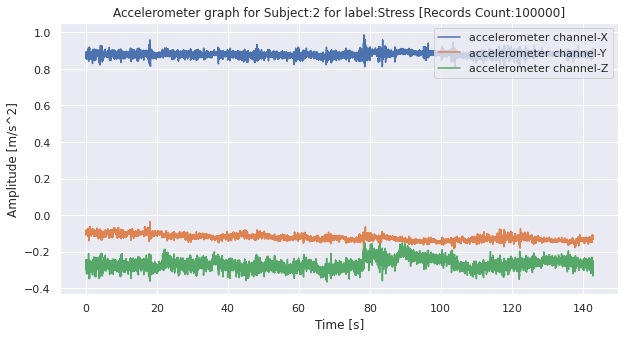

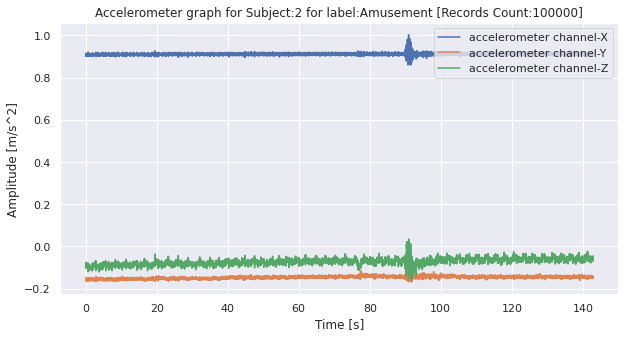

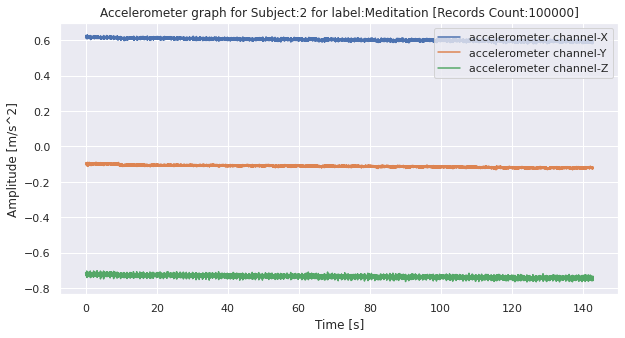

In [23]:
# pass subject number for which graph to be created
datavis.plot_acc_for_subject(dataset=data_raw_filtered,
                             subject= 2,
                             num_of_records = 100000,
                             labels = list(effective_state_label.keys()),
                             first_last = 'first')

#### Sensor Graph for a Subject, e.g. "ECG"

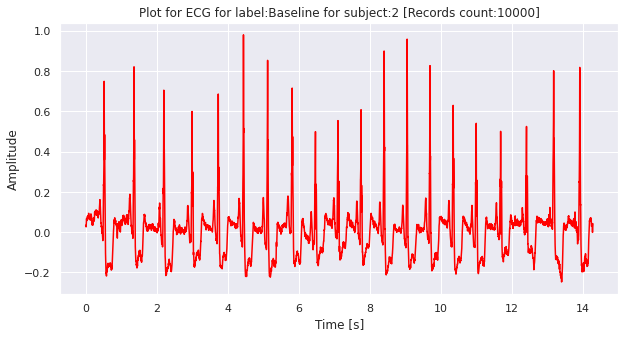

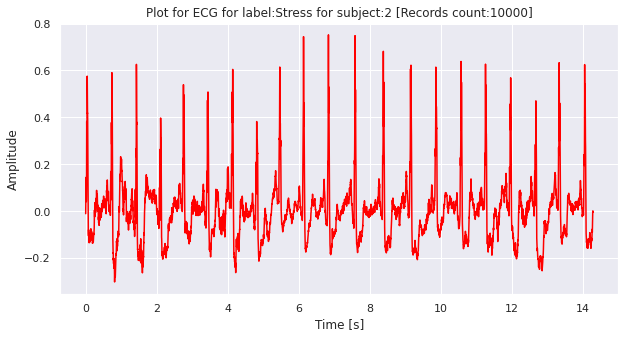

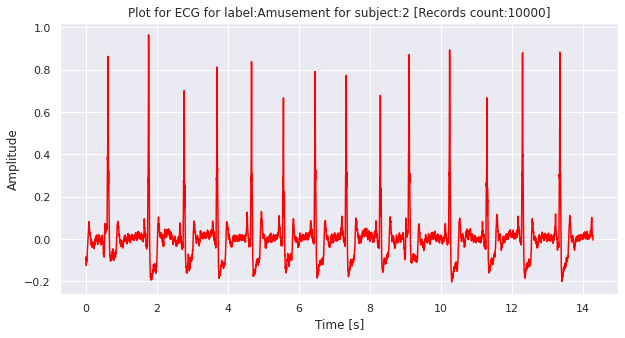

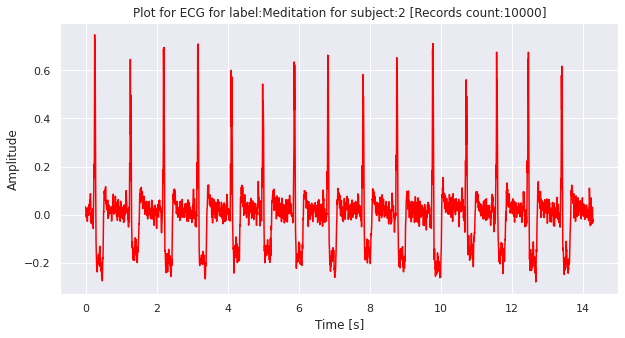

In [25]:
# Create Sensor line graph for a subject                            
datavis.plot_data_for_subject(dataset=data_raw_filtered,
                              subject = 2,
                              num_of_records = 10000,
                              sensor_type = 'ECG',
                              labels = list(effective_state_label.keys()),
                              first_last = 'first'
                              )

##### Data Distribution for different Sensors

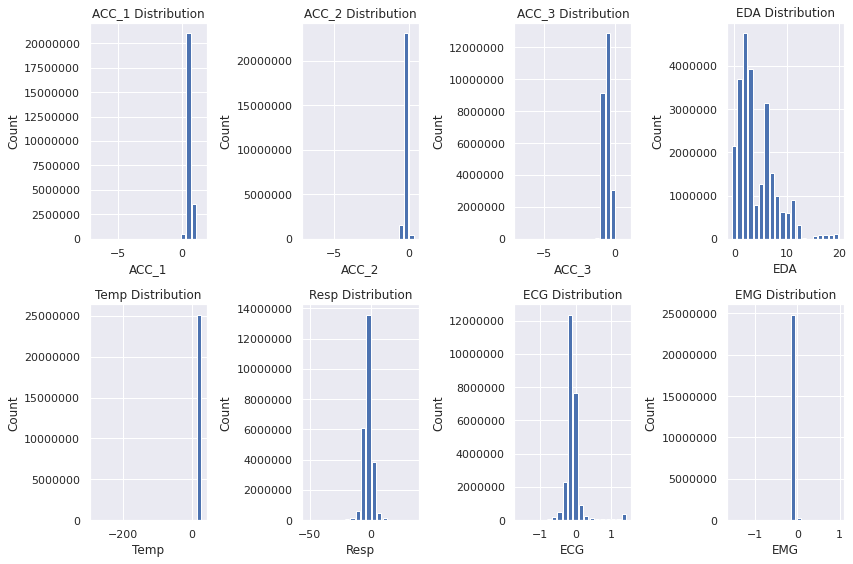

In [26]:
sensor_list = ['ACC_1', 'ACC_2', 'ACC_3','EDA', 'Temp', 'Resp', 'ECG', 'EMG']
datavis.plot_sensor_data(data_raw_filtered,sensor_list)

### Feature Enginnering

In [34]:
# run this code to access the latest modified python file after uploading
# import importlib
# import Capstone_Feature_Extraction as feature_extraction
# importlib.reload(feature_extraction)

<module 'Capstone_Feature_Extraction' from '/home/pankajs/Capstone/Capstone_Feature_Extraction.py'>

##### Down sampling original data from 700 Hz to 50 Hz frequency to reduce the number of records for Analysis

In [29]:
data_raw_filtered = utility.data_sampling(data_raw_filtered,sample_rate=700,down_sample_freq='50ms')
data_raw_filtered.head()

Shape before down sampling: (25137704, 56)
level_values: <bound method MultiIndex.get_level_values of MultiIndex([( 2, 1,           '1970-01-01 00:00:00'),
            ( 2, 1, '1970-01-01 00:00:00.001428571'),
            ( 2, 1, '1970-01-01 00:00:00.002857142'),
            ( 2, 1, '1970-01-01 00:00:00.004285714'),
            ( 2, 1, '1970-01-01 00:00:00.005714285'),
            ( 2, 1, '1970-01-01 00:00:00.007142857'),
            ( 2, 1, '1970-01-01 00:00:00.008571428'),
            ( 2, 1,    '1970-01-01 00:00:00.010000'),
            ( 2, 1, '1970-01-01 00:00:00.011428571'),
            ( 2, 1, '1970-01-01 00:00:00.012857143'),
            ...
            (14, 4, '1970-01-01 09:58:30.992857142'),
            (14, 4, '1970-01-01 09:58:30.994285713'),
            (14, 4, '1970-01-01 09:58:30.995714285'),
            (14, 4, '1970-01-01 09:58:30.997142856'),
            (14, 4, '1970-01-01 09:58:30.998571428'),
            (14, 4, '1970-01-01 09:58:30.999999999'),
            (14, 4

Unnamed: 0     ACC_1     ACC_2  \
subject label time                                                      
2       1     1970-01-01 00:00:00.000    214600.0  0.889131 -0.104177   
              1970-01-01 00:00:00.050    214635.0  0.889731 -0.100206   
              1970-01-01 00:00:00.100    214670.0  0.893480 -0.103223   
              1970-01-01 00:00:00.150    214705.0  0.878366 -0.113154   
              1970-01-01 00:00:00.200    214740.0  0.890411 -0.117394   

                                          ACC_3       ECG       EMG       EDA  \
subject label time                                                              
2       1     1970-01-01 00:00:00.000 -0.254086  0.052203  0.000302  5.712509   
              1970-01-01 00:00:00.050 -0.242897  0.076138 -0.005188  5.707354   
              1970-01-01 00:00:00.100 -0.248234  0.073135 -0.003722  5.698667   
              1970-01-01 00:00:00.150 -0.236754  0.054067  0.000221  5.692651   
              1970-01-01 00:00:00.200 -0.238989  0.058294 -0.003258  5.685992   

                                            Temp      Resp   age  ...  \
subject label time                                                ...   
2       1     1970-01-01 00:00:00.000  29.119919  1.025521  27.0  ...   
              1970-01-01 00:00:00.050  29.119755  0.710013  27.0  ...   
              1970-01-01 00:00:00.100  29.125584  0.327802  27.0  ...   
              1970-01-01 00:00:00.150  29.133441 -0.066877  27.0  ...   
              1970-01-01 00:00:00.200  29.122919 -0.490505  27.0  ...   

                                       STAI06_PLEASANT  SAM01_VALENCE  \
subject label time                                                      
2       1     1970-01-01 00:00:00.000              3.0            7.0   
              1970-01-01 00:00:00.050              3.0            7.0   
              1970-01-01 00:00:00.100              3.0            7.0   
              1970-01-01 00:00:00.150              3.0            7.0   
              1970-01-01 00:00:00.200              3.0            7.0   

                                       SAM02_AROUSAL  SSQ01_GOALS  \
subject label time                                                  
2       1     1970-01-01 00:00:00.000            2.0          NaN   
              1970-01-01 00:00:00.050            2.0          NaN   
              1970-01-01 00:00:00.100            2.0          NaN   
              1970-01-01 00:00:00.150            2.0          NaN   
              1970-01-01 00:00:00.200            2.0          NaN   

                                       SSQ02_SUCCEED  SSQ03_MOTIVATED  \
subject label time                                                      
2       1     1970-01-01 00:00:00.000            NaN              NaN   
              1970-01-01 00:00:00.050            NaN              NaN   
              1970-01-01 00:00:00.100            NaN              NaN   
              1970-01-01 00:00:00.150            NaN              NaN   
              1970-01-01 00:00:00.200            NaN              NaN   

                                       SSQ04_REFLECTED  SSQ03_THINK  \
subject label time                                                    
2       1     1970-01-01 00:00:00.000              NaN          NaN   
              1970-01-01 00:00:00.050              NaN          NaN   
              1970-01-01 00:00:00.100              NaN          NaN   
              1970-01-01 00:00:00.150              NaN          NaN   
              1970-01-01 00:00:00.200              NaN          NaN   

                                       SSQ03_IMPRESSION   seconds  
subject label time                                                 
2       1     1970-01-01 00:00:00.000               NaN  0.024286  
              1970-01-01 00:00:00.050               NaN  0.074286  
              1970-01-01 00:00:00.100               NaN  0.124286  
              1970-01-01 00:00:00.150               NaN  0.174286  
              1970-01-01 00:00:00

In [30]:
data_raw_filtered = data_raw_filtered.reset_index()
display(data_raw_filtered.head())
features_list = ['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA','Temp', 'Resp']

,subject,label,time,Unnamed: 0,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,STAI06_PLEASANT,SAM01_VALENCE,SAM02_AROUSAL,SSQ01_GOALS,SSQ02_SUCCEED,SSQ03_MOTIVATED,SSQ04_REFLECTED,SSQ03_THINK,SSQ03_IMPRESSION,seconds
0,2,1,1970-01-01 00:00:00.000,214600.0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,3.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.024286
1,2,1,1970-01-01 00:00:00.050,214635.0,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,3.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.074286
2,2,1,1970-01-01 00:00:00.100,214670.0,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,3.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.124286
3,2,1,1970-01-01 00:00:00.150,214705.0,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,3.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.174286
4,2,1,1970-01-01 00:00:00.200,214740.0,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,3.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.224286


#### Derive stats feature for the sensors

In [31]:
stats_features_dict = {}
stats_features_dict = feature_extraction.get_stats_features(data_raw_filtered,features_list)
print('Stats feature derived:',list(stats_features_dict.keys()))

Stats feature derived: ['ACC_1_mean', 'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std', 'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min', 'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean', 'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max']


In [32]:
# Add mean and std features in the main dataset
# for key,value in stats_features_dict.items():
for key,value in list(stats_features_dict.items()):
    data_raw_filtered[key] = value

In [33]:
print('Stats feature added in the raw dataset:',len(list(stats_features_dict.keys())))
print('Dataset shape post adding stats feature:',data_raw_filtered.shape)
data_raw_filtered.head()

Stats feature added in the raw dataset: 32
Dataset shape post adding stats feature: (718277, 90)


,subject,label,time,Unnamed: 0,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,EDA_min,EDA_max,Temp_mean,Temp_std,Temp_min,Temp_max,Resp_mean,Resp_std,Resp_min,Resp_max
0,2,1,1970-01-01 00:00:00.000,214600.0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,0.0,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807
1,2,1,1970-01-01 00:00:00.050,214635.0,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,0.0,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807
2,2,1,1970-01-01 00:00:00.100,214670.0,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,0.0,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807
3,2,1,1970-01-01 00:00:00.150,214705.0,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,0.0,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807
4,2,1,1970-01-01 00:00:00.200,214740.0,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,0.0,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807


In [35]:
# save data here for next processing and avoid re-running code from begining
# data_raw_filtered.to_csv(file_path+'data_raw_filtered_stats_50ms.csv')

#### Derive ACC related features

In [23]:
# data_raw_filtered = data_raw_filtered.reset_index()
acc_df = data_raw_filtered[['ACC_1', 'ACC_2', 'ACC_3']]
print('ACC dataset shape:',acc_df.shape)
data_with_acc_features = feature_extraction.get_acc_features(acc_df)
print('Updated dataset shape:',data_with_acc_features.shape)
data_with_acc_features.head()

ACC dataset shape: (718277, 3)
Total Number of records to be added for each feature: 718277
Batch Size: 1026.11



Total Number of Unique features derived: 88
Updated dataset shape: (718277, 17)


,acc_x,acc_y,acc_z,l2_mean,l2_std,l2_min,l2_max,l2_ptp,l2_sum,l2_energy,l2_peaks,l2_rms,l2_lineintegral,l2_n_above_mean,l2_n_below_mean,l2_n_sign_changes,l2_entropy
0,0.889131,-0.104177,-0.254086,0.933292,0.025367,0.487367,11.431535,10.944168,670362.074272,626105.656649,2,0.933637,3686.999267,296947,421330,0,13.484351
1,0.889731,-0.100206,-0.242897,0.933292,0.025367,0.487367,11.431535,10.944168,670362.074272,626105.656649,2,0.933637,3686.999267,296947,421330,0,13.484351
2,0.893480,-0.103223,-0.248234,0.933292,0.025367,0.487367,11.431535,10.944168,670362.074272,626105.656649,2,0.933637,3686.999267,296947,421330,0,13.484351
3,0.878366,-0.113154,-0.236754,0.933292,0.025367,0.487367,11.431535,10.944168,670362.074272,626105.656649,2,0.933637,3686.999267,296947,421330,0,13.484351
4,0.890411,-0.117394,-0.238989,0.933292,0.025367,0.487367,11.431535,10.944168,670362.074272,626105.656649,2,0.933637,3686.999267,296947,421330,0,13.484351


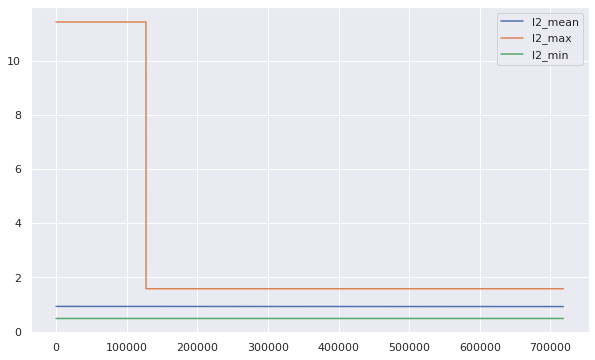

In [24]:
_ = data_with_acc_features[['l2_mean', 'l2_max', 'l2_min']].plot(figsize=(10,6))

###### Save ACC features dataset

In [32]:
# data_with_acc_features.columns

In [26]:
file_name = 'data_with_acc_features_50ms.csv'
data_with_acc_features.to_csv(file_path+file_name)

#### Derive EDA feature

In [28]:
eda_df = data_raw_filtered[['EDA']]
print('efd_df shape',eda_df.shape)
eda_df_sample = eda_df#[:70000]
print('eda df sample:',eda_df_sample.shape)

eda_features_data = feature_extraction.get_eda_features(eda_df_sample)
print('Updated dataset shape:',eda_features_data.shape)
eda_features_data.head()

efd_df shape (718277, 1)
eda df sample: (718277, 1)
Total Number of records to be added for each feature: 718277
Batch Size: 1026.11



Total Number of Unique features: 44
Updated dataset shape: (718277, 17)


,EDA,tonic_mean,tonic_std,tonic_min,tonic_max,tonic_energy,tonic_peaks,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,5.712509,-2.16241,11.898271,-73.667251,15.821124,1.050443e+08,27.0,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,5.707354,-2.16241,11.898271,-73.667251,15.821124,1.050443e+08,27.0,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,5.698667,-2.16241,11.898271,-73.667251,15.821124,1.050443e+08,27.0,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,5.692651,-2.16241,11.898271,-73.667251,15.821124,1.050443e+08,27.0,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,5.685992,-2.16241,11.898271,-73.667251,15.821124,1.050443e+08,27.0,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029


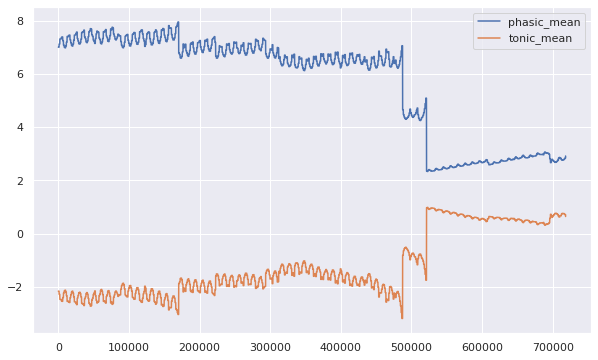

In [29]:
_ = eda_features_data[['phasic_mean', 'tonic_mean']].plot(figsize=(10,6))

##### Save EDA dataset with features

In [30]:
file_name = 'data_with_eda_features_50ms.csv'
eda_features_data.to_csv(file_path+file_name)

### Add frequency column from ECG - finds peaks of ECG raw signal

In [36]:
##### add frequency column from ECG

#####################################################################
### add frequency feature here (PL - custom column / feature):
var_increment = 5000
var_ECG_frequency = feature_extraction.get_ECG_feature_column(data_raw_filtered["ECG"], var_increment)
var_frequency_df = var_ECG_frequency[0]

data_raw_filtered["ECG_freq"] = var_frequency_df["ECG_freq"]
# print(data_raw.dtypes)

print('original dataset with ECG Freq shape:',data_raw_filtered.shape)
display(data_raw_filtered.head())

original dataset with ECG Freq shape: (718277, 91)


,subject,label,time,Unnamed: 0,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,EDA_max,Temp_mean,Temp_std,Temp_min,Temp_max,Resp_mean,Resp_std,Resp_min,Resp_max,ECG_freq
0,2,1,1970-01-01 00:00:00.000,214600.0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807,15.0
1,2,1,1970-01-01 00:00:00.050,214635.0,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807,15.0
2,2,1,1970-01-01 00:00:00.100,214670.0,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807,15.0
3,2,1,1970-01-01 00:00:00.150,214705.0,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807,15.0
4,2,1,1970-01-01 00:00:00.200,214740.0,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,20.364336,33.857539,1.452812,-273.15,35.652885,0.049622,3.750778,-50.0,37.63807,15.0


##### Extract EDA Features++
* Derive additional EDA features

In [37]:
eda_signal = data_raw_filtered['EDA']
eda_features_dict = feature_extraction.eda_features(eda_signal)
print(eda_features_dict)
# Add EDA features in the main dataset
for key,value in eda_features_dict.items():
    data_raw_filtered[key] = value
# print('EDA feature added in the raw dataset:',list(data_raw.columns))
print('Dataset dimension post adding EDA feature:',data_raw_filtered.shape)
# data_raw_filtered = data_raw_filtered.reset_index()
data_raw_filtered.head()

{'eda_amp_mean': nan, 'eda_amp_std': nan, 'eda_rise_mean': 319545.0209309791, 'eda_rise_std': 204741.51708906353, 'eda_recovery_mean': -338341.0944511668, 'eda_recovery_std': 228463.1666478904, 'eda_scr_num': 202475, 'eda_scr_freq': 197.32289910438453}
Dataset dimension post adding EDA feature: (718277, 99)


,subject,label,time,Unnamed: 0,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,Resp_max,ECG_freq,eda_amp_mean,eda_amp_std,eda_rise_mean,eda_rise_std,eda_recovery_mean,eda_recovery_std,eda_scr_num,eda_scr_freq
0,2,1,1970-01-01 00:00:00.000,214600.0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,37.63807,15.0,NaN,NaN,319545.020931,204741.517089,-338341.094451,228463.166648,202475,197.322899
1,2,1,1970-01-01 00:00:00.050,214635.0,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,37.63807,15.0,NaN,NaN,319545.020931,204741.517089,-338341.094451,228463.166648,202475,197.322899
2,2,1,1970-01-01 00:00:00.100,214670.0,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,37.63807,15.0,NaN,NaN,319545.020931,204741.517089,-338341.094451,228463.166648,202475,197.322899
3,2,1,1970-01-01 00:00:00.150,214705.0,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,37.63807,15.0,NaN,NaN,319545.020931,204741.517089,-338341.094451,228463.166648,202475,197.322899
4,2,1,1970-01-01 00:00:00.200,214740.0,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,37.63807,15.0,NaN,NaN,319545.020931,204741.517089,-338341.094451,228463.166648,202475,197.322899


##### Derive EMG Features

In [39]:
emg_data = data_raw_filtered['EMG'].to_numpy()# load EMG data from WESAD dataset
sampling_rate = 700 # sampling rate of EMG data
emg_features_dict = feature_extraction.extract_emg_features(emg_data, sampling_rate)
print(emg_features_dict)

Setting up band-pass filter from 10 - 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 325.00 Hz)
- Filter length: 925 samples (1.321 sec)

{'variance': 8.160149136508401e-06, 'rms': 0.0028565974754535804, 'wl': 1281.4139345995186, 'zc': 411413.0, 'mav': 0.0011320304244767287}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [40]:
# Add features in the dataset
for key,value in list(emg_features_dict.items()):
    data_raw_filtered[key] = value
print('EMG feature added in the raw dataset:',len(list(emg_features_dict.keys())))
print('Dataset shape post adding EMG feature:',data_raw_filtered.shape)
data_raw_filtered.head()

EMG feature added in the raw dataset: 5
Dataset shape post adding EMG feature: (718277, 105)


,index,subject,label,time,Unnamed: 0,ACC_1,ACC_2,ACC_3,ECG,EMG,...,eda_rise_std,eda_recovery_mean,eda_recovery_std,eda_scr_num,eda_scr_freq,variance,rms,wl,zc,mav
0,0,2,1,1970-01-01 00:00:00.000,214600.0,0.889131,-0.104177,-0.254086,0.052203,0.000302,...,204741.517089,-338341.094451,228463.166648,202475,197.322899,0.000008,0.002857,1281.413935,411413.0,0.001132
1,1,2,1,1970-01-01 00:00:00.050,214635.0,0.889731,-0.100206,-0.242897,0.076138,-0.005188,...,204741.517089,-338341.094451,228463.166648,202475,197.322899,0.000008,0.002857,1281.413935,411413.0,0.001132
2,2,2,1,1970-01-01 00:00:00.100,214670.0,0.893480,-0.103223,-0.248234,0.073135,-0.003722,...,204741.517089,-338341.094451,228463.166648,202475,197.322899,0.000008,0.002857,1281.413935,411413.0,0.001132
3,3,2,1,1970-01-01 00:00:00.150,214705.0,0.878366,-0.113154,-0.236754,0.054067,0.000221,...,204741.517089,-338341.094451,228463.166648,202475,197.322899,0.000008,0.002857,1281.413935,411413.0,0.001132
4,4,2,1,1970-01-01 00:00:00.200,214740.0,0.890411,-0.117394,-0.238989,0.058294,-0.003258,...,204741.517089,-338341.094451,228463.166648,202475,197.322899,0.000008,0.002857,1281.413935,411413.0,0.001132


#### Combine all features for final dataset for Machine Learning

In [42]:
file_path

'/scratch/siads699w23_class_root/siads699w23_class/team8_cpastone_2023/'

In [43]:
# load dataset from files:

# load acc data
data_with_acc_features = pd.read_csv(file_path+'data_with_acc_features_50ms.csv')
print('ACC feature dataset:',data_with_acc_features.shape)
# print('ACC dataset attributes:\n',data_with_acc_features.columns)

#load EDA dataset
eda_features_data = pd.read_csv(file_path+'data_with_eda_features_50ms.csv')
print('EDA features dataset:',eda_features_data.shape)

# print('EDA dataset attributes:\n',eda_features_data.columns)
print('Original Dataset shape:',data_raw_filtered.shape)

ACC feature dataset: (718277, 18)
EDA features dataset: (718277, 18)
Original Dataset shape: (718277, 104)


In [46]:
##### Concatenate dataset
df_dataset_for_ml = pd.concat([data_raw_filtered,data_with_acc_features,eda_features_data],axis=1)
print('final dataset for ML:',df_dataset_for_ml.shape)
df_dataset_for_ml.head()

final dataset for ML: (718277, 140)


,subject,label,time,Unnamed: 0,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,2,1,1970-01-01 00:00:00.000,214600.0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,2,1,1970-01-01 00:00:00.050,214635.0,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,1,1970-01-01 00:00:00.100,214670.0,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,2,1,1970-01-01 00:00:00.150,214705.0,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,2,1,1970-01-01 00:00:00.200,214740.0,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029


In [54]:
df_dataset_for_ml = df_dataset_for_ml.drop('Unnamed: 0', axis=1)
df_dataset_for_ml.shape

(718277, 137)

##### Save final Dataset for ML work

In [58]:
df_dataset_for_ml.shape

(718277, 137)

In [61]:
df_dataset_for_ml.to_csv(file_path+'Capstone_final_dataset_for_ml_50ms.csv')

In [62]:
df_final = pd.read_csv(file_path+'Capstone_final_dataset_for_ml_50ms.csv')
df_final.shape

(718277, 138)

In [63]:
df_final.head()

,Unnamed: 0,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,0,2,1,1970-01-01 00:00:00.000,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,1,2,1,1970-01-01 00:00:00.050,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,2,1,1970-01-01 00:00:00.100,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,3,2,1,1970-01-01 00:00:00.150,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,4,2,1,1970-01-01 00:00:00.200,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
